   # Assignment-5   

# Case Study on Regression

## The given dataset contains price of second-hand Hyundai grand i10 car with
## respect to year of making. Find the best linear relationship between year and
## price. Can you predict the possible price of a 2022 model second-hand grand i10?
## Please learn about lasso regression and create a model along with linear
## regression. Find out which one is performing better.

In [62]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv(r"C:\Users\illca\Downloads\car_age_price.csv")
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [64]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [65]:
df.tail()

,Year,Price
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000
111,2015,425000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [67]:
df.shape

(112, 2)

In [68]:
df.count()

Year     112
Price    112
dtype: int64

In [69]:
df.columns

Index(['Year', 'Price'], dtype='object')

In [70]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [71]:
df.isna().sum()

Year     0
Price    0
dtype: int64

C:\Users\illca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


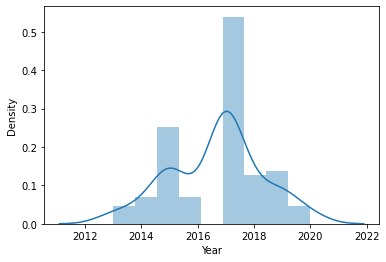

In [72]:
sns.distplot(df["Year"])
plt.show()

C:\Users\illca\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


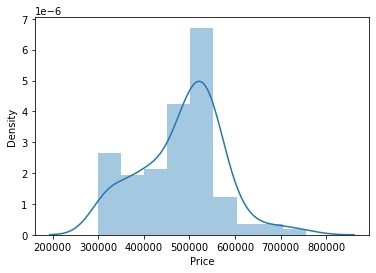

In [73]:
sns.distplot(df["Price"])
plt.show()

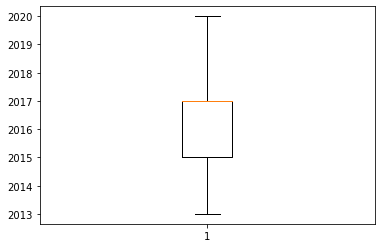

In [74]:
plt.boxplot(df["Year"])
plt.show()

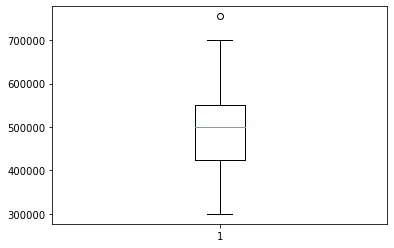

In [75]:
plt.boxplot(df["Price"])
plt.show()

In [76]:
Q1=np.percentile(df["Price"],25,interpolation="midpoint")
Q2=np.percentile(df["Price"],50,interpolation="midpoint")
Q3=np.percentile(df["Price"],75,interpolation="midpoint")

In [77]:
print(Q1)
print(Q2)
print(Q3)

422500.0
500000.0
550000.0


In [78]:
IQR=Q3-Q1

In [79]:
IQR

127500.0

In [80]:
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

In [81]:
low_limit

231250.0

In [82]:
high_limit

741250.0

In [83]:
out=[]
for i in df["Price"]:
    if [i]>high_limit or [i]<low_limit:
        out.append(i)

In [84]:
out

[755000]

In [85]:
ind=df["Price"]>high_limit
df.loc[ind].index

Int64Index([1], dtype='int64')

In [86]:
df=df.drop([1],axis=0)

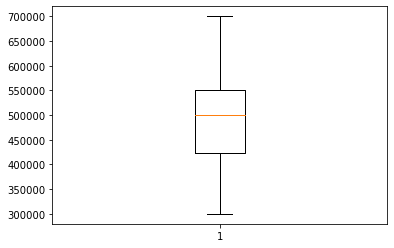

In [87]:
plt.boxplot(df["Price"])
plt.show()

In [88]:
df

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [89]:
x=df["Year"]
y=df["Price"]
print("x is", x)
print("y is", y)

x is 0      2018
2      2019
3      2018
4      2018
5      2015
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 111, dtype: int64
y is 0      465000
2      700000
3      465000
4      465000
5      350000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 111, dtype: int64


In [90]:
#We dont need to do encoder beacue its numerical values.


<AxesSubplot:title={'center':'Scatterplot of Year and Price'}, xlabel='Year', ylabel='Price'>

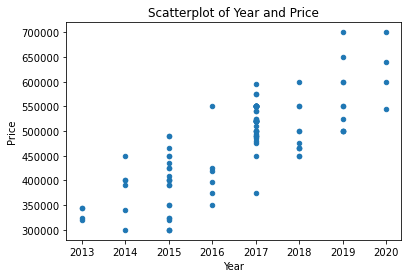

In [91]:
df.plot.scatter(x='Year', y='Price', title='Scatterplot of Year and Price')

### Find the best linear relationship between year and price.

In [92]:
import scipy.stats

In [93]:
scipy.stats.pearsonr(df["Year"], (df["Price"]) )

(0.7764490802365358, 1.3527564349402733e-23)

In [94]:
df["Year"].corr(df["Price"])

0.7764490802365349

In [95]:
# We can see they are moderate positively correlated.

In [96]:
x = df['Year'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 
print("x_train is \n", x_train) 
print("y_train is \n", y_train)
print("x_test is \n", x_test)
print("y_test is \n", y_test)

x_train is 
 [[2017]
 [2017]
 [2017]
 [2016]
 [2015]
 [2017]
 [2018]
 [2017]
 [2017]
 [2019]
 [2017]
 [2014]
 [2015]
 [2017]
 [2019]
 [2016]
 [2017]
 [2017]
 [2019]
 [2017]
 [2017]
 [2014]
 [2017]
 [2015]
 [2017]
 [2019]
 [2015]
 [2017]
 [2017]
 [2018]
 [2017]
 [2017]
 [2017]
 [2017]
 [2015]
 [2013]
 [2017]
 [2015]
 [2017]
 [2018]
 [2019]
 [2020]
 [2017]
 [2017]
 [2015]
 [2017]
 [2017]
 [2017]
 [2018]
 [2020]
 [2018]
 [2015]
 [2017]
 [2014]
 [2015]
 [2018]
 [2016]
 [2018]
 [2017]
 [2014]
 [2015]
 [2017]
 [2014]
 [2015]
 [2015]
 [2015]
 [2018]
 [2019]
 [2020]
 [2019]
 [2013]
 [2015]
 [2018]
 [2017]
 [2017]
 [2016]
 [2017]
 [2017]
 [2017]
 [2015]
 [2019]
 [2017]
 [2015]
 [2016]
 [2017]
 [2017]
 [2013]
 [2017]]
y_train is 
 [[550000]
 [550000]
 [550000]
 [396000]
 [325000]
 [500000]
 [450000]
 [520000]
 [520000]
 [500000]
 [450000]
 [341000]
 [450000]
 [550000]
 [600000]
 [425000]
 [525000]
 [595000]
 [525000]
 [550000]
 [550000]
 [400000]
 [550000]
 [465000]
 [509999]
 [550000]
 [400000]

In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [99]:
regressor.fit(x_train, y_train)

LinearRegression()

In [100]:
y_pred = regressor.predict(x_test)
print("y_pred for the given test data is", y_pred) 

y_pred for the given test data is [[418695.08304033]
 [541198.43288521]
 [418695.08304033]
 [418695.08304033]
 [500363.98293692]
 [418695.08304033]
 [500363.98293692]
 [582032.8828335 ]
 [622867.33278179]
 [500363.98293692]
 [418695.08304033]
 [377860.63309203]
 [541198.43288521]
 [418695.08304033]
 [500363.98293692]
 [500363.98293692]
 [500363.98293692]
 [337026.18314373]
 [459529.53298862]
 [582032.8828335 ]
 [582032.8828335 ]
 [500363.98293692]
 [500363.98293692]]


In [101]:
from sklearn.metrics import mean_squared_error,r2_score

In [102]:
mse = mean_squared_error(y_test, y_pred)

In [103]:
print("The MSE for this model predictions is", mse)

The MSE for this model predictions is 2360736941.0488067


In [104]:
R_Square_value=r2_score(y_test,y_pred)

In [105]:
print("The R Squared value for this model predictions is", R_Square_value)

The R Squared value for this model predictions is 0.7087665874512326


## Can you predict the possible price of a 2022 model second-hand grand i10?

In [106]:
pred = regressor.predict([[2022]]) 
print("For the given Year the Price will be:", pred)

For the given Year the Price will be: [[704536.23267838]]


## Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [107]:
from sklearn.linear_model import Lasso

In [108]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 

Lasso(alpha=0.01)

In [109]:
pred_train_lasso= model_lasso.predict(x_train)

In [110]:
print("The MSE is " ,mean_squared_error(y_train,pred_train_lasso))
print("The R Squared value for this model predictions is",r2_score(y_train, pred_train_lasso))

The MSE is  3247879368.590529
The R Squared value for this model predictions is 0.5618200058757356


## Linear Regression Model is performin better than lasso cuz for linear we got MSE= 2360736941.0488067 And for Lasso we got MSE= 3247879368.590529. so we take mse with least error.

# The end.